In [43]:
import sklearn
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from numpy import random
from matplotlib import cm

data_set = load_breast_cancer()



In [44]:
print("Name of Target: ", data_set['target_names'])
print("Name of Feature: ", data_set['feature_names'])


Name of Target:  ['malignant' 'benign']
Name of Feature:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


0.9087719298245615


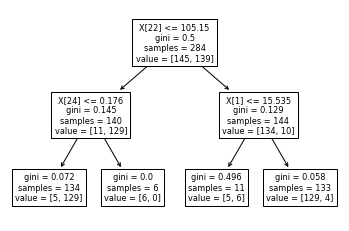

In [45]:
x = data_set['data']
y =  data_set['target']


X_train = x[:(len(x)//2)]
X_test = x[(len(x)//2):]
Y_train = y[:(len(y)//2)]
Y_test = y[(len(y)//2):]

test_tree = tree.DecisionTreeClassifier(max_depth=2)
test_tree = test_tree.fit(X_train, Y_train)
tree.plot_tree(test_tree)

accuracy = test_tree.score(X_test, Y_test)
print(accuracy)

        

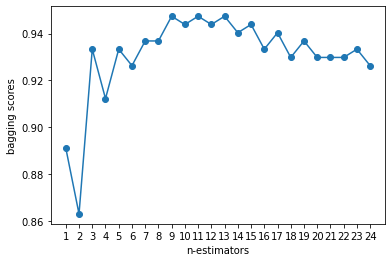

In [46]:
n_estimators = []
bagging_scores = []
for i in range(1,25):
    bagging_test = BaggingClassifier(n_estimators=i, random_state=0).fit(X_train, Y_train)
    bagging_score = bagging_test.score(X_test, Y_test)
    n_estimators.append(i)
    bagging_scores.append(bagging_score)

plt.plot(n_estimators,bagging_scores, marker='o')
plt.xlabel('n-estimators')
plt.ylabel('bagging scores')
plt.xticks(n_estimators)

plt.show()



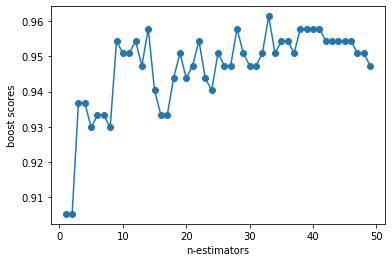

In [47]:
n_estimators = []
boost_scores = []
i = 0
for i in range(1,50):
    boost_test = AdaBoostClassifier(n_estimators=i, random_state=0).fit(X_train, Y_train)
    boost_score = boost_test.score(X_test, Y_test)
    n_estimators.append(i)
    boost_scores.append(boost_score)

plt.plot(n_estimators,boost_scores, marker='o')
plt.xlabel('n-estimators')
plt.ylabel('boost scores')

plt.show()


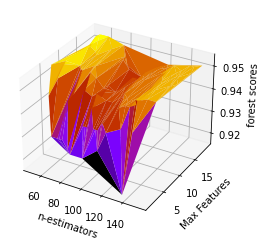

In [54]:
n_estimators = []
forest_scores = []
max_depths = []
i = 0
for i in range(50,155):
    depth = random.randint(1,20)
    forest_test = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=0).fit(X_train, Y_train)
    forest_score = forest_test.score(X_test, Y_test)
    n_estimators.append(i)
    forest_scores.append(forest_score)
    max_depths.append(depth)
    
    
ax = plt.figure().add_subplot(projection='3d')




ax.plot_trisurf(n_estimators,max_depths,forest_scores, linewidth=.5, cmap=cm.gnuplot)
ax.set_xlabel('n-estimators')
ax.set_zlabel('forest scores')
ax.set_ylabel('Max Features')

plt.show()
